In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read Data
data = pd.read_csv('ex2data1.txt', header=None)
data.columns = ['Exam1', 'Exam2', 'Result']

In [3]:
#Data Summary
data.head()

,Exam1,Exam2,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
#We use this function to create new column
def label_result(data):
    if data['Result'] == 1:
        return 'Admitted'
    else:
        return 'Not Admitted'

In [5]:
#The column created for visualization
data['Result_Name'] = data.apply (lambda data: label_result(data),axis=1)

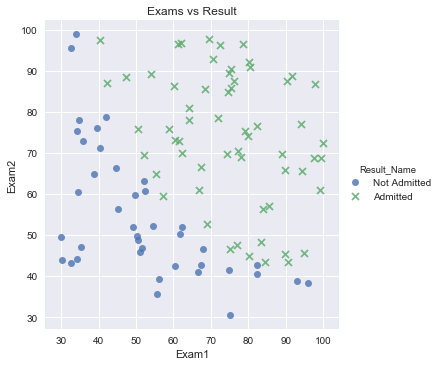

In [6]:
#plotting House Size vs Price
sns.lmplot(x='Exam1', y='Exam2', hue='Result_Name',data=data, fit_reg=False, markers=["o", "x"])
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('Exams vs Result')

We use Logistic Regression to make classification

In [7]:
#Create X Matrix
X = data[['Exam1','Exam2']].values
X.shape

(100, 2)

In [8]:
#Add x0 column
def addColumn(X):
    values = np.full(X.shape[0],1).reshape(-1,1)
    X_norm = np.concatenate([values, X],axis=1)
    return X_norm

In [9]:
X = addColumn(X)
X.shape

(100, 3)

In [10]:
#Create Y Matrix
Y = data['Result'].reshape(-1,1)
Y.shape

(100, 1)

In [11]:
#İnitialize Theta
theta = np.zeros((X.shape[1]))
theta = theta[:,np.newaxis]
theta.shape

(3, 1)

In [12]:
#Define sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [13]:
#Define Cost Function
def costfunction(theta,X,Y):
    J = 0;
    theta = theta.reshape(-1,1)
    m = Y.size
    h = sigmoid( np.dot(X, theta) )
    J = (1 / m) * np.sum( (np.dot(-Y.T , np.log(h))) - (np.dot((1 - Y).T , np.log(1 - h))) )
    grad = (1 / m) * np.dot(X.T , (h - Y))
    return J,grad

In [14]:
#Calculate theta for initial value
J,grad_1 = costfunction(theta,X,Y)

In [15]:
#Check Cost Function 
J

0.69314718055994518

In [16]:
#Check Grad for initia_theta
grad_1

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

In [17]:
#Define new test Theta
test_theta = np.array([-24, 0.2, 0.2])
test_theta.shape

(3,)

In [18]:
#Calculate theta for test_theta value
J_2,grad_2 = costfunction(test_theta,X,Y)

In [19]:
#Check Cost Value
J_2

0.21833019382659796

In [20]:
#Check Grad for test_theta
grad_2

array([[ 0.04290299],
       [ 2.56623412],
       [ 2.64679737]])

In this part Andrew NG used fminc built-in function for optimizing the grad parameters

For Python we use scipy.optimize library to do the same thing

In [21]:
#import library
import scipy.optimize as opt

In [22]:
#optimized theta calculation
theta_optimized = opt.fmin_tnc(func=costfunction, x0=theta, args=(X, Y))[0]

In [23]:
#Check theta value
theta_optimized

array([-25.16131863,   0.20623159,   0.20147149])

In [24]:
#Calculate cost function
J_3,grad_3 = costfunction(test_theta,X,Y)

In [25]:
#Check Cost Value
J_3

0.21833019382659796

In [26]:
X_test = np.array([1,45,85]).reshape(1,-1)

In [27]:
print('For a student with scores 45 and 85, we predict an admission probability of {} \n'.format(sigmoid( np.dot(X_test, theta_optimized))) )

For a student with scores 45 and 85, we predict an admission probability of [ 0.77629062] 



Value is exactly the same as calculated in Anrew Ng Course

In [28]:
#Prediction Function
def predict(theta,X):
    prob = sigmoid( np.dot(X, theta) )
    res = np.zeros(prob.size)
    for i in range(prob.size):
        if prob[i] >= 0.5:
            res[i] = int(1)
        else:
            res[i] = int(0)
    return res.astype('int64')

In [29]:
#Make prediction with the optimized theta values
res = predict(theta_optimized,X)

In [30]:
#Check the accuracy of the model
res = res == Y.T[0:,]

In [31]:
print('accuracy = {}'.format((sum(res[0])/res[0].size)*100))

accuracy = 89.0


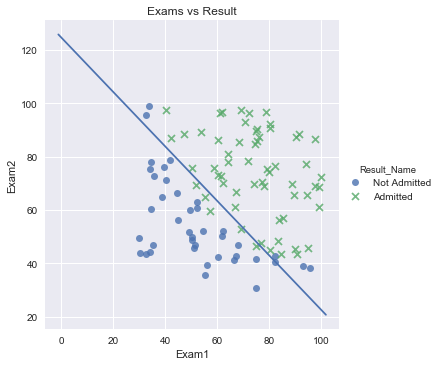

In [44]:
#Decision Boundry plot
x = np.linspace(X.min()-2, X.max()+2, 50)
y = -(theta_optimized[0] + theta_optimized[1]*x)/theta_optimized[2]
sns.lmplot(x='Exam1', y='Exam2', hue='Result_Name',data=data, fit_reg=False, markers=["o", "x"])
plt.plot(x, y)
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('Exams vs Result')

Same Accuracy value with Andrew Ng Course